In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Reading and normalizing data

In [2]:
data = pd.read_csv("train.csv")
names = data["Name"]
ids = data["PassengerId"]
data = data.drop(["Name", "PassengerId"], axis = 1)
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
data = data.fillna(-1)

In [3]:
data = pd.get_dummies(data)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_110152,Ticket_110413,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,3,1,22.0,1,0,7.2500,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,0,-1.0,1,2,23.4500,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = data["Survived"]
data = data.drop("Survived", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.22, random_state = 11)

# Logistic Regression

## Logistic Regression without scaling

In [5]:
logit = LogisticRegression(class_weight = "balanced", solver = "lbfgs", random_state = 11, verbose = True, n_jobs = -1)

In [6]:
params = {
    "C": [1.0, 0.1, 0.01, 0.001, 0.0001],
}
best_logit = GridSearchCV(logit, params, scoring = "accuracy", verbose = 10)

In [7]:
best_logit.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=1.0, score=0.741, total=   4.1s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=1.0, score=0.799, total=   2.7s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=1.0, score=0.820, total=   2.5s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=1.0, score=0.799, total=   2.5s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=1.0, score=0.725, total=   4.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=0.1, score=0.719, total=   4.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=0.1, score=0.777, total=   3.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=0.1, score=0.791, total=   2.9s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=0.1, score=0.784, total=   1.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................... C=0.1, score=0.739, total=   1.6s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] .............................. C=0.01, score=0.719, total=   1.4s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] .............................. C=0.01, score=0.806, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] .............................. C=0.01, score=0.763, total=   1.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] .............................. C=0.01, score=0.755, total=   1.3s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] .............................. C=0.01, score=0.768, total=   1.8s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................. C=0.001, score=0.662, total=   1.4s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................. C=0.001, score=0.712, total=   1.3s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................. C=0.001, score=0.619, total=   1.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................. C=0.001, score=0.662, total=   1.0s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................. C=0.001, score=0.681, total=   1.2s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................ C=0.0001, score=0.626, total=   0.5s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................ C=0.0001, score=0.669, total=   0.8s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................ C=0.0001, score=0.590, total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................ C=0.0001, score=0.640, total=   0.6s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] ............................ C=0.0001, score=0.652, total=   0.6s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=11, solver='lbfgs',
                                          tol=0.0001, verbose=True,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(best_logit.predict(X_test), y_test)

0.8223350253807107

### Let's have a look at the feature importane

In [20]:
pd.DataFrame({"feature": X_train.columns,
             "coef": best_logit.best_estimator_.coef_.flatten()}).sort_values(by = "coef", ascending = False)

,feature,coef
87,Ticket_1601,1.598093
569,Ticket_C.A. 37671,0.973664
244,Ticket_29106,0.876958
351,Ticket_347742,0.841480
336,Ticket_347077,0.767198
...,...,...
340,Ticket_347082,-0.727368
402,Ticket_349909,-0.745565
344,Ticket_347088,-0.821938
0,Pclass,-1.190084


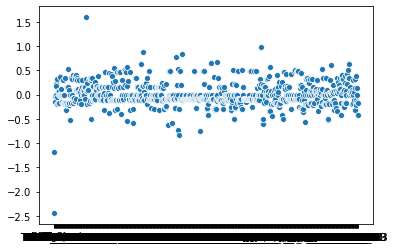

In [26]:
sns.scatterplot(X_train.columns, best_logit.best_estimator_.coef_.flatten());

Need to look at the data without "Sex" feature

In [87]:
coefs = np.delete(best_logit.best_estimator_.coef_.flatten(), 1)
cols = X_train.columns.drop("Sex")

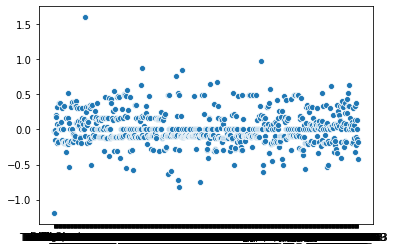

In [88]:
sns.scatterplot(cols, coefs);

## Logistic Regression with scaling

In [10]:
logit = LogisticRegression(class_weight = "balanced", solver = "lbfgs", random_state = 11, verbose = True, n_jobs = -1)

In [11]:
logit.fit(StandardScaler().fit_transform(X_train), y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)

In [89]:
accuracy_score(logit.predict(StandardScaler().fit_transform(X_test)), y_test)

0.8578680203045685

### Let's have a look at the feature importane

In [27]:
pd.DataFrame({"feature": X_train.columns,
             "coef": logit.coef_.flatten()}).sort_values(by = "coef", ascending = False)

,feature,coef
87,Ticket_1601,0.474280
351,Ticket_347742,0.463446
569,Ticket_C.A. 37671,0.431985
240,Ticket_2908,0.401270
244,Ticket_29106,0.389719
...,...,...
340,Ticket_347082,-0.428232
344,Ticket_347088,-0.436394
2,Age,-0.483665
0,Pclass,-0.642121


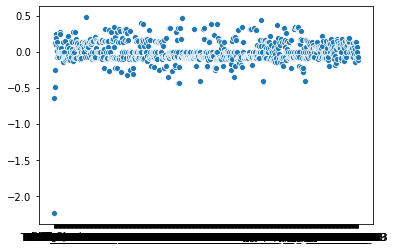

In [29]:
sns.scatterplot(X_train.columns, logit.coef_.flatten());

Need to look at the data without "Sex" feature

In [73]:
coefs = np.delete(logit.coef_.flatten(), 1)
cols = X_train.columns.drop("Sex")

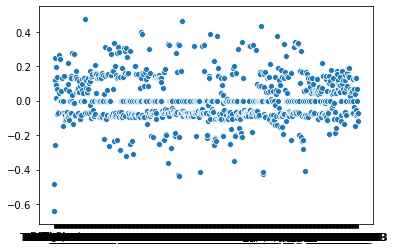

In [81]:
sns.scatterplot(cols, coefs);

### Conclusion: Logistic Regression with scaling is better because there are less strong weights (those highlighting any features. In this case it is "Sex", in the previous one (without scaling) they are "Sex", "Pclass", and different tickets)

# Random Forest

In [14]:
rf = RandomForestClassifier(max_features = "auto", random_state = 11, verbose = True, class_weight = "balanced")

In [15]:
params = {
    "max_depth": np.arange(5, 12),
    "min_samples_split": np.arange(5, 12),
    "oob_score": [True, False]
}
best_rf = GridSearchCV(rf, params, n_jobs = -1, verbose = 2)

In [16]:
best_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   58.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=11,
                         

In [90]:
accuracy_score(best_rf.predict(X_test), y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8426395939086294

### Let's have a look at the feature importane

In [18]:
importance = pd.DataFrame({"col": X_train.columns,
             "coef": best_rf.best_estimator_.feature_importances_}).sort_values(by = "coef", ascending = False);

In [19]:
importance

,col,coef
1,Sex,0.243775
0,Pclass,0.118583
5,Fare,0.107634
688,Cabin_-1,0.057108
2,Age,0.030088
...,...,...
299,Ticket_341826,0.000000
681,Ticket_W./C. 14263,0.000000
294,Ticket_335097,0.000000
293,Ticket_334912,0.000000


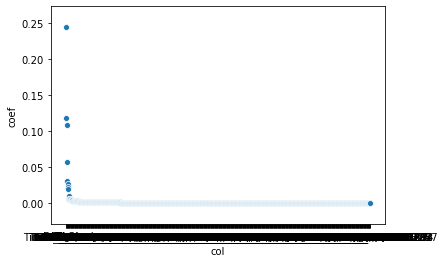

In [92]:
sns.scatterplot(importance["col"], importance["coef"]);

### Very bad result. Means that there are just several features that help the model to predict the result

## As I mentioned in the Analysis, Sex, Pclass and Age are very important features

# Finally, Logistic Regression is the best model of classification this data (TSNE gave a hint). Scaling is needed.